In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [176]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [178]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

<built-in method values of Tensor object at 0x000001A8EE24CE10>


In [243]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [182]:
df.duplicated().sum()

0

In [247]:
# label encoding: to covert the species to numerical values
df["Sex"] = df["Sex"].replace("M", 0)
df["Sex"] = df["Sex"].replace("F", 1)
df["ExerciseAngina"] = df["ExerciseAngina"].replace("Y", 1)
df["ExerciseAngina"] = df["ExerciseAngina"].replace("N", 0)
df["ST_Slope"] = df["ST_Slope"].replace("Down", 0)
df["ST_Slope"] = df["ST_Slope"].replace("Up", 1)
df["ST_Slope"] = df["ST_Slope"].replace("Flat", 2)
df["ChestPainType"] = df["ChestPainType"].replace("ASY", 0)
df["ChestPainType"] = df["ChestPainType"].replace("NAP", 1)
df["ChestPainType"] = df["ChestPainType"].replace("ATA", 2)
df["ChestPainType"] = df["ChestPainType"].replace("TA", 3)
df["RestingECG"] = df["RestingECG"].replace("Normal", 0)
df["RestingECG"] = df["RestingECG"].replace("LVH", 1)
df["RestingECG"] = df["RestingECG"].replace("ST", 2)



In [249]:
df["RestingECG"].value_counts()

RestingECG
0    552
1    188
2    178
Name: count, dtype: int64

In [188]:
df["ChestPainType"].unique()

array([2, 1, 0, 3], dtype=int64)

In [190]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,2,1
2,37,0,2,130,283,0,2,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,2,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0


In [192]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

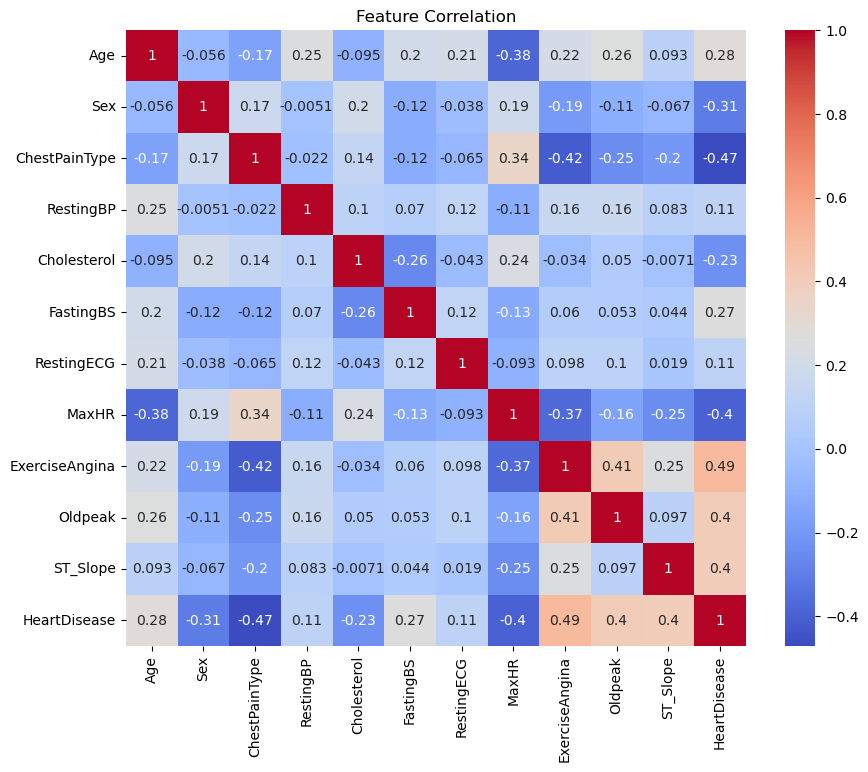

In [194]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [259]:
# Feature scaling
scaler = StandardScaler()
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_scaled = scaler.fit_transform(X)

In [261]:
# convert the dataframe to array
X = X.values
y = y.values

In [272]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)

In [274]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


In [276]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [143]:
pip install pytorch


  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pytorch
Failed to build pytorch
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\BRING JOY\AppData\Local\Temp\pip-install-wzqbk485\pytorch_38d8a721d6dc43cda86fd986bfc5e337\setup.py", line 15, in <module>
      raise Exception(message)
  Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


In [278]:
X_train[0:10], y_train[0:10]

(array([[-0.79670232, -0.51595242,  1.34508565, -1.69673583, -0.01646075,
          1.81375843, -0.74705543,  0.75415714, -0.8235563 , -0.83243239,
         -0.6990726 ],
        [ 1.00653719, -0.51595242, -0.80424181, -0.12951283,  0.99886471,
         -0.55134134, -0.74705543,  0.04678968,  1.21424608,  1.04375945,
          0.91742273],
        [-1.00884815, -0.51595242, -0.80424181, -0.66993455, -0.27257889,
         -0.55134134, -0.74705543,  0.28257883,  1.21424608,  1.79423618,
         -2.31556793],
        [ 0.79439137, -0.51595242, -0.80424181,  0.95133062, -1.81843477,
         -0.55134134, -0.74705543, -0.77847236,  1.21424608,  1.04375945,
          0.91742273],
        [ 0.05188098,  1.93816322,  0.27042192, -1.21035628,  0.13903954,
         -0.55134134, -0.74705543,  0.83275352, -0.8235563 ,  0.66852108,
          0.91742273],
        [ 0.90046428,  1.93816322, -0.80424181, -0.66993455, -1.81843477,
          1.81375843,  1.77425665, -0.54268321,  1.21424608,  0.7623306

In [282]:

# Define ANN model
class HeartANN(nn.Module):
    def __init__(self, input_dim):
        super(HeartANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.output(x))
        return x

In [285]:
# Initialize model
model = HeartANN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [287]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [297]:
# Training loop
for epoch in range(100):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.3294
Epoch [20/100], Loss: 0.2214
Epoch [30/100], Loss: 0.1941
Epoch [40/100], Loss: 0.1001
Epoch [50/100], Loss: 0.1972
Epoch [60/100], Loss: 0.2642
Epoch [70/100], Loss: 0.1918
Epoch [80/100], Loss: 0.3156
Epoch [90/100], Loss: 0.1245
Epoch [100/100], Loss: 0.1193


Accuracy: 0.8696
Precision: 0.8899
Recall: 0.8899
F1 Score: 0.8899


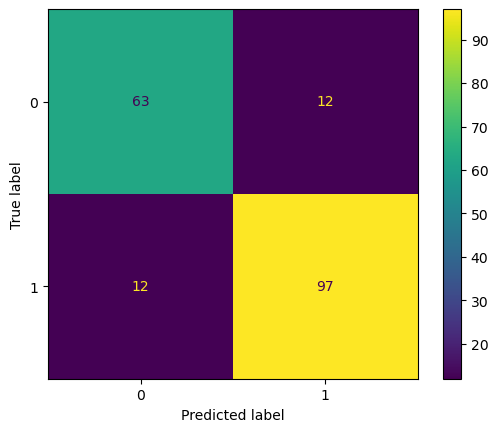

In [299]:


  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Get predictions
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs >= 0.5).float()

# Convert tensors to numpy for evaluation
y_true_np = y_test_tensor.numpy()
y_pred_np = y_pred.numpy()

# Metrics
acc = accuracy_score(y_true_np, y_pred_np)
prec = precision_score(y_true_np, y_pred_np)
rec = recall_score(y_true_np, y_pred_np)
f1 = f1_score(y_true_np, y_pred_np)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true_np, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [309]:
new_data_dict = torch.tensor([55, 1, 2, 130, 250, 0, 1, 150, 0, 1.2, 2])
    #'Age': 55,
    #'Sex': 1,  # Encoded: 1 for Male, 0 for Female
   # 'ChestPainType': 2,  # Encoded: e.g., 0-3 depending on original categories
    #'RestingBP': 130,
   # 'Cholesterol': 250,
    #'FastingBS': 0,
    #'RestingECG': 1,
    #'MaxHR': 150,
    #'ExerciseAngina': 0,
    #'#Oldpeak': 1.2,
    #'ST_Slope': 2  # Encoded value
    


model.eval()
with torch.no_grad():
    pred_prob = model(new_data_dict)
    prediction = int((pred_prob >= 0.5).item())

# Output
print("Predicted Risk of Heart Disease:" , "Yes (1)" if prediction == 1 else "No (0)")

Predicted Risk of Heart Disease: Yes (1)


In [311]:
print("Saving model")
torch.save(obj=model.state_dict(), f="Heart_Failure.pth")

Saving model


In [319]:
!pip install gradio

  Using cached gradio-5.25.2-py3-none-any.whl.metadata (16 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.5.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached gradio_client-1.8.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached orjson-3.10.16-cp312-cp312-win_amd64.whl.metadata (42 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached ruff-0.11.6-py3-none-win_amd64.whl.metadata (26 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached starlette-0.46.2-py3-none-any.whl.metadata (6.2 kB)
  Using cached tomlkit-0.13.2-py3-none-any.whl.

In [321]:
import gradio as gr

In [329]:
# Prediction function for Gradio
def predict_heart_disease(Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS,
                          RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope):
    input_data = {
        'Age': Age,
        'Sex': Sex,
        'ChestPainType': ChestPainType,
        'RestingBP': RestingBP,
        'Cholesterol': Cholesterol,
        'FastingBS': FastingBS,
        'RestingECG': RestingECG,
        'MaxHR': MaxHR,
        'ExerciseAngina': ExerciseAngina,
        'Oldpeak': Oldpeak,
        'ST_Slope': ST_Slope
    }

    df = pd.DataFrame([input_data])
    scaled = scaler.transform(df)
    tensor = torch.tensor(scaled, dtype=torch.float32)
    
    model.eval()
    with torch.no_grad():
        prob = model(tensor)
        pred = int((prob >= 0.5).item())
    
    return "🔴 Risk of Heart Disease" if pred == 1 else "🟢 No Risk of heart failure Detected"


In [331]:
# Create Gradio interface
inputs = [
    gr.Number(label="Age"),
    gr.Dropdown([0, 1], label="Sex (0=Female, 1=Male)"),
    gr.Dropdown([0, 1, 2, 3], label="ChestPainType (Encoded 0-3)"),
    gr.Number(label="RestingBP"),
    gr.Number(label="Cholesterol"),
    gr.Dropdown([0, 1], label="FastingBS"),
    gr.Dropdown([0, 1, 2], label="RestingECG (Encoded)"),
    gr.Number(label="MaxHR"),
    gr.Dropdown([0, 1], label="ExerciseAngina (0=No, 1=Yes)"),
    gr.Number(label="Oldpeak"),
    gr.Dropdown([0, 1, 2], label="ST_Slope (Encoded)")
]


In [335]:
gr.Interface(
    fn=predict_heart_disease,
    inputs=inputs,
    outputs="text",
    title=" Heart Disease Risk Predictor",
    description="Enter clinical data to predict the risk of heart disease using a trained ANN model"
).launch()

* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
